In [0]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType, FloatType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession with Hive support
spark = SparkSession.builder \
    .appName("ETL Pipeline") \
    .enableHiveSupport() \
    .getOrCreate()


In [0]:
# Step 1: Data Extraction - Access the 'playlist' table from Hive Metastore
try:
    hive_table_name = "playlist"  # Hive table name
    df = spark.table(hive_table_name)
    print("Data extraction successful.")
except Exception as e:
    print("Error during data extraction:", e)

Data extraction successful.


In [0]:
# Step 2: Data Transformation - Perform data transformations using Spark SQL
try:
    # Register the DataFrame as a SQL temporary view
    df.createOrReplaceTempView("playlist_view")

    # Example transformation: select relevant columns and rename 'track_name' to 'song'
    df_transformed = spark.sql("""
        SELECT 
            track_name AS song, 
            artist_name, 
            danceability, 
            energy, 
            loudness 
        FROM playlist_view
    """)
    print("Data transformation successful.")
except Exception as e:
    print("Error during data transformation:", e)

Data transformation successful.


In [0]:
# Step 3: Data Loading - Store the transformed data in Delta Lake
try:
    delta_path = "/mnt/delta/playlist"  
    df_transformed.write.format("delta").mode("overwrite").save(delta_path)
    print("Data loading successful.")
except Exception as e:
    print("Error during data loading:", e)

Data loading successful.


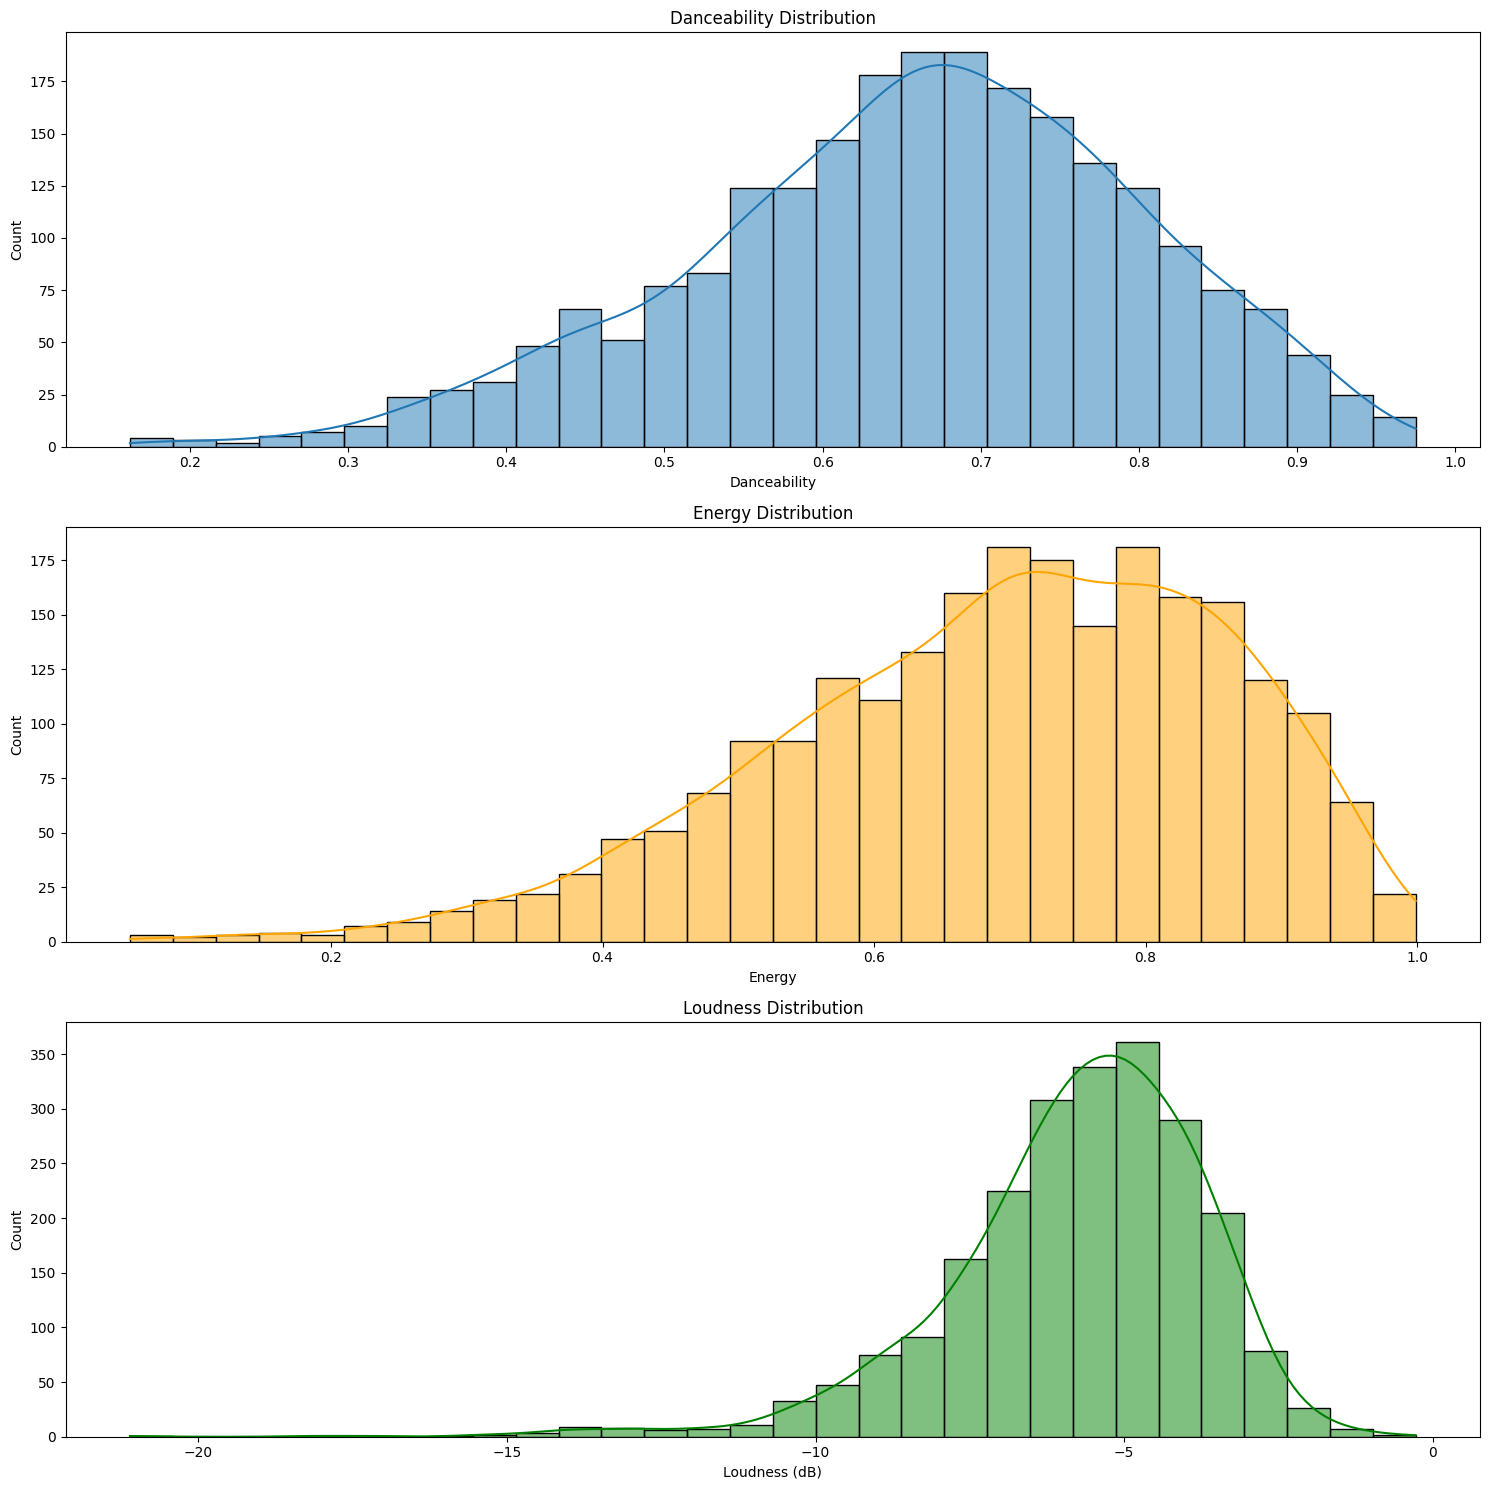

Complex data visualization successful.


In [0]:
# Step 4: Data Visualization - Using Matplotlib and seaborn for complex figures
try:
    # Convert Spark DataFrame to Pandas DataFrame for visualization
    pandas_df = df_transformed.toPandas()

    # Set up the matplotlib figure
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

    # Plot 'danceability' distribution
    sns.histplot(pandas_df['danceability'], bins=30, ax=axs[0], kde=True)
    axs[0].set_title('Danceability Distribution')
    axs[0].set_xlabel('Danceability')
    axs[0].set_ylabel('Count')

    # Plot 'energy' distribution
    sns.histplot(pandas_df['energy'], bins=30, ax=axs[1], color="orange", kde=True)
    axs[1].set_title('Energy Distribution')
    axs[1].set_xlabel('Energy')
    axs[1].set_ylabel('Count')

    # Plot 'loudness' distribution
    sns.histplot(pandas_df['loudness'], bins=30, ax=axs[2], color="green", kde=True)
    axs[2].set_title('Loudness Distribution')
    axs[2].set_xlabel('Loudness (dB)')
    axs[2].set_ylabel('Count')

    # Tightly layout the plots
    plt.tight_layout()
    plt.show()
    print("Complex data visualization successful.")
except Exception as e:
    print("Error during complex data visualization:", e)


In [0]:
# Step 5: Error Handling and Data Validation
try:
    # Example data validation checks
    # Check for missing values in key columns
    for column in ["song", "artist_name", "danceability", "energy", "loudness"]:
        missing_count = df_transformed.filter(df_transformed[column].isNull()).count()
        if missing_count > 0:
            raise ValueError(f"Missing values found in column: {column}")

    # Check for data type consistency
    for column in ["danceability", "energy", "loudness"]:
        if not isinstance(df_transformed.schema[column].dataType, (IntegerType, FloatType, DoubleType)):
            raise TypeError(f"Incorrect data type for column: {column}")

    # Check for duplicate entries
    if df_transformed.count() > df_transformed.dropDuplicates(["song", "artist_name"]).count():
        raise Exception("Duplicate records found in the data.")

    print("Data validation checks passed successfully.")
except ValueError as ve:
    print("Data Validation Error:", ve)
except TypeError as te:
    print("Type Error:", te)
except Exception as e:
    print("An error occurred during data processing:", e)

Data Validation Error: Missing values found in column: danceability
